# Validation regularization and callbacks

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
print(np.__version__)
print(tf.__version__)

1.18.1
2.2.0


## Validation sets
### Load the data

In [33]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_datasets = load_diabetes()
print(diabetes_datasets['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [34]:
# Save the input and target variables
print(diabetes_datasets.keys())

data = diabetes_datasets['data']
target = diabetes_datasets['target']

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [35]:
# Normalize the target data
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [36]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### Train a feedforward neural network model

In [37]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [38]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [39]:
# Compo;e the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [40]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [41]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 1.0697 - mae: 0.8205


[1.069692611694336, 0.8204967975616455]

### Plot the learning curves

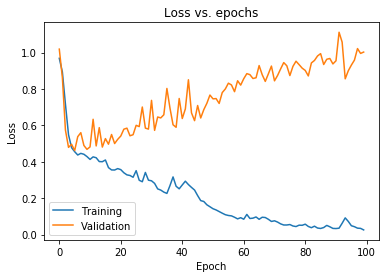

In [42]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Model regularization
### Adding regularization with weight decay and dropout

In [43]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [44]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],), 
                                                   kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [45]:
# Rebuild the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               1408      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)              

In [46]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [47]:
# Train the model
history = model.fit(train_data, train_target, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [48]:
# Evaluate the model on the test set
model.evaluate(test_data, test_target)

2/2 [==============================] - 0s 1ms/step - loss: 0.6833 - mae: 0.6312


[0.6832603216171265, 0.6311589479446411]

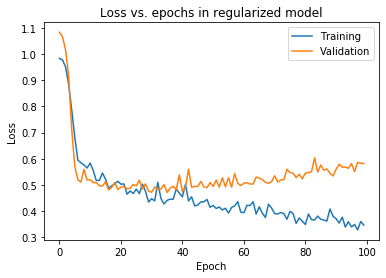

In [49]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs in regularized model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

## Batch Normalization

In this reading we will look at incorporating batch normalisation into our models and look at an example of how we do this in practice.

In [50]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

### Defining the model
We can implement batch normalisation into our model by adding it in the same way as any other layer.

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [52]:
model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               16640     
Total params: 17,856
Trainable params: 17,600
Non-trainable params: 256
________________________________________________

Recall that there are some parameters and hyperparameters associated with batch normalisation.

* The hyperparameter **momentum** is the weighting given to the previous running mean when re-computing it with an extra minibatch. By **default**, it is set to 0.99.

* The hyperparameter **$\epsilon$** is used for numeric stability when performing the normalisation over the minibatch. By **default** it is set to 0.001.

* The parameters **$\beta$** and **$\gamma$** are used to implement an affine transformation after normalisation. By **default**, $\beta$ is an all-zeros vector, and $\gamma$ is an all-ones vector.

### Customising parameters
These can all be changed (along with various other properties) by adding optional arguments to `tf.keras.layers.BatchNormalization()`.

We can also specify the axis for batch normalisation. By default, it is set as -1.

In [54]:
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [55]:
model.add(Dense(1))

### Compile and fit the model

Let's now compile and fit our model with batch normalisation, and track the progress on training and validation sets.

In [56]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

Now we fit the model to the data.

In [57]:
history = model.fit(train_data, train_target, epochs=100, validation_split=0.15, 
                    batch_size=64,verbose=False)

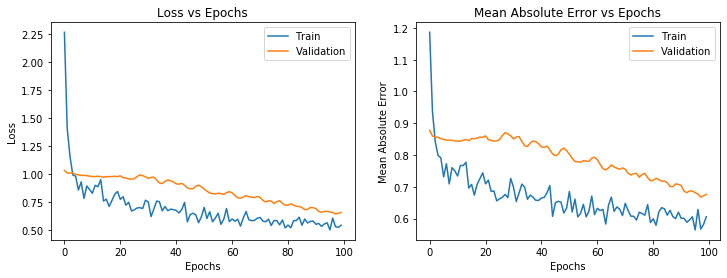

In [58]:
frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()

### Further reading and resources
* https://keras.io/layers/normalization/
* https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/BatchNormalization

## Introduction to callbacks
### Example training callback

In [59]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")

In [60]:
model = get_regularized_model(1e-5, 0.3)
model.compile(optimizer='adam', loss='mse')

### Train the model with the callback

In [61]:
history = model.fit(train_data, train_target, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [62]:
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
            
    def on_test_end(self, logs=None):
        print("Finished testing!")

In [63]:
# Evaluate the model
model.evaluate(test_data, test_target, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


0.8144127130508423

In [64]:
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
            
    def on_predict_end(self, logs=None):
        print("Finished prediction!")

In [65]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[ 0.05367572],
       [ 0.02730056],
       [ 0.04670479],
       [ 0.03151745],
       [-0.10866749],
       [-0.07198624],
       [ 0.02913937],
       [-0.05226843],
       [-0.04915022],
       [-0.09879415],
       [-0.0500516 ],
       [-0.05026601],
       [-0.07571288],
       [-0.11831144],
       [-0.08727985],
       [-0.04147087],
       [-0.03557036],
       [-0.07165921],
       [ 0.06356618],
       [-0.10310388],
       [-0.0240622 ],
       [ 0.0236267 ],
       [ 0.05433996],
       [-0.12775083],
       [-0.00053475],
       [-0.10424733],
       [ 0.02401153],
       [-0.02789945],
       [ 0.04182512],
       [-0.01858287],
       [ 0.04469276],
       [ 0.02085058],
       [ 0.04383869],
       [-0.01260521],
       [-0.06001461],
       [-0.09897459],
       [ 0.03266499],
       [ 0.04926426],
       [ 0.04510839],
       [ 0.00492399],
       [-0.04935402],
       [-0.02126458],
       [-0.03343842],
       [-0.08510692],
       [ 0.05830481]], dtype=flo

## Using the logs dictionary

In this reading, we will learn how to take advantage of the `logs` dictionary in Keras to define our own callbacks and check the progress of a model.

The `logs` dictionary stores the loss value, along with all of the metrics we are using at the end of a batch or epoch.

We can incorporate information from the `logs` dictionary into our own custom callbacks.

Let's see this in action in the context of a model we will construct and fit to the `sklearn` diabetes dataset that we have been using in this module.

In [66]:
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

We now compile the model, with
* Mean squared error as the loss function,
* the Adam optimizer, and 
* Mean absolute error (`mae`) as a metric.

In [67]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [68]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 65        
Total params: 18,305
Trainable params: 18,177
Non-trainable params: 128
________________________________________________

### Defining a custom callback

Now we define our custom callback using the `logs` dictionary to access the loss and metric values.

In [69]:
class LossAndMetricCallback(tf.keras.callbacks.Callback):

    # Print the loss after every second batch in the training set
    def on_train_batch_end(self, batch, logs=None):
        if batch %2 ==0:
            print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))
    
    # Print the loss after each batch in the test set
    def on_test_batch_end(self, batch, logs=None):
        print('\n After batch {}, the loss is {:7.2f}.'.format(batch, logs['loss']))

    # Print the loss and mean absolute error after each epoch
    def on_epoch_end(self, epoch, logs=None):
        print('Epoch {}: Average loss is {:7.2f}, mean absolute error is {:7.2f}.'
              .format(epoch, logs['loss'], logs['mae']))
    
    # Notify the user when prediction has finished on each batch
    def on_predict_batch_end(self, batch, logs=None):
        print("Finished prediction on batch {}!".format(batch))

We now fit the model to the data, and specify that we would like to use our custom callback `LossAndMetricCallback()`.

In [71]:
history = model.fit(train_data, train_target, epochs=20,
                    batch_size=100, callbacks=[LossAndMetricCallback()], verbose=False)


 After batch 0, the loss is    1.01.

 After batch 2, the loss is    0.92.
Epoch 0: Average loss is    0.88, mean absolute error is    0.79.

 After batch 0, the loss is    0.67.

 After batch 2, the loss is    0.58.
Epoch 1: Average loss is    0.60, mean absolute error is    0.64.

 After batch 0, the loss is    0.45.

 After batch 2, the loss is    0.49.
Epoch 2: Average loss is    0.49, mean absolute error is    0.56.

 After batch 0, the loss is    0.35.

 After batch 2, the loss is    0.46.
Epoch 3: Average loss is    0.46, mean absolute error is    0.53.

 After batch 0, the loss is    0.39.

 After batch 2, the loss is    0.43.
Epoch 4: Average loss is    0.42, mean absolute error is    0.51.

 After batch 0, the loss is    0.36.

 After batch 2, the loss is    0.40.
Epoch 5: Average loss is    0.42, mean absolute error is    0.51.

 After batch 0, the loss is    0.52.

 After batch 2, the loss is    0.42.
Epoch 6: Average loss is    0.39, mean absolute error is    0.50.

 Afte

We can also use our callback in the `evaluate` function...

In [72]:
model_eval = model.evaluate(test_data, test_target, batch_size=10, 
                            callbacks=[LossAndMetricCallback()], verbose=False)


 After batch 0, the loss is    0.77.

 After batch 1, the loss is    0.93.

 After batch 2, the loss is    0.75.

 After batch 3, the loss is    0.78.

 After batch 4, the loss is    0.80.


...And also the `predict` function.

In [73]:
model_pred = model.predict(test_data, batch_size=10,
                           callbacks=[LossAndMetricCallback()], verbose=False)

Finished prediction on batch 0!
Finished prediction on batch 1!
Finished prediction on batch 2!
Finished prediction on batch 3!
Finished prediction on batch 4!


### Application - learning rate scheduler
Let's now look at a more sophisticated custom callback. 

We are going to define a callback to change the learning rate of the optimiser of a model during training. We will do this by specifying the epochs and new learning rates where we would like it to be changed.

First we define the auxillary function that returns the learning rate for each epoch based on our schedule.

In [74]:
lr_schedule = [
    (4, 0.03), (7, 0.02), (11, 0.005), (15, 0.007)
]

def get_new_epoch_lr(epoch, lr):
    # Checks to see if the input epoch is listed in the learning rate schedule 
    # and if so, returns index in lr_schedule
    epoch_in_sched = [i for i in range(len(lr_schedule)) if lr_schedule[i][0]==int(epoch)]
    if len(epoch_in_sched) > 0:
        # If it is, return the learning rate corresponding to the epoch
        return lr_schedule[epoch_in_sched[0]][1]
    else:
        # Otherwise, return the existing learning rate
        return lr

Let's now define the callback itself.

In [75]:
class LRScheduler(tf.keras.callbacks.Callback):
    
    def __init__(self, new_lr):
        super(LRScheduler, self).__init__()
        # Add the new learning rate function to our callback
        self.new_lr = new_lr

    def on_epoch_begin(self, epoch, logs=None):
        # Make sure that the optimizer we have chosen has a learning rate, and raise an error if not
        if not hasattr(self.model.optimizer, 'lr'):
              raise ValueError('Error: Optimizer does not have a learning rate.')
                
        # Get the current learning rate
        curr_rate = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        
        # Call the auxillary function to get the scheduled learning rate for the current epoch
        scheduled_rate = self.new_lr(epoch, curr_rate)

        # Set the learning rate to the scheduled learning rate
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_rate)
        print('Learning rate for epoch {} is {:7.3f}'.format(epoch, scheduled_rate))

In [76]:
new_model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)        
])

In [77]:
new_model.compile(loss='mse',
                optimizer="adam",
                metrics=['mae', 'mse'])

In [79]:
new_history = new_model.fit(train_data, train_target, epochs=20,
                            batch_size=100, callbacks=[LRScheduler(get_new_epoch_lr)], verbose=False)

Learning rate for epoch 0 is   0.001
Learning rate for epoch 1 is   0.001
Learning rate for epoch 2 is   0.001
Learning rate for epoch 3 is   0.001
Learning rate for epoch 4 is   0.030
Learning rate for epoch 5 is   0.030
Learning rate for epoch 6 is   0.030
Learning rate for epoch 7 is   0.020
Learning rate for epoch 8 is   0.020
Learning rate for epoch 9 is   0.020
Learning rate for epoch 10 is   0.020
Learning rate for epoch 11 is   0.005
Learning rate for epoch 12 is   0.005
Learning rate for epoch 13 is   0.005
Learning rate for epoch 14 is   0.005
Learning rate for epoch 15 is   0.007
Learning rate for epoch 16 is   0.007
Learning rate for epoch 17 is   0.007
Learning rate for epoch 18 is   0.007
Learning rate for epoch 19 is   0.007


### Further reading and resources
* https://www.tensorflow.org/guide/keras/custom_callback
* https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback

## Early Stopping and patience

### Re-train the model with early stopping

In [80]:
# Re-train unregularized model
unregularized_model = get_model()
unregularized_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularized_model.fit(train_data, train_target, epochs=100,
                                        validation_split=0.15, batch_size=64, verbose=False,
                                        callbacks=[tf.keras.callbacks.EarlyStopping()])

In [82]:
# Evaluate the model on the test set
unregularized_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.5347


0.5347242951393127

In [83]:
# Re-train regularized model
regularized_model = get_regularized_model(1e-8, 0.2)
regularized_model.compile(optimizer='adam', loss='mse')
reg_history = regularized_model.fit(train_data, train_target, epochs=100,
                                    validation_split=0.15, batch_size=64, verbose=False,
                                    callbacks=[tf.keras.callbacks.EarlyStopping()])

In [84]:
regularized_model.evaluate(test_data, test_target, verbose=2)

2/2 - 0s - loss: 0.4989


0.498929888010025